### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Data/StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [7]:
data[data["Exam_Score"] > 100] = 100
data[data["Physical_Activity"] > 7] = data["Physical_Activity"].mean()
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.973344,80.005956,7.034492,75.052052,1.494981,2.972717,67.236749
std,5.988592,11.588737,1.468850,14.426893,1.233345,1.028926,3.973648
min,1.000000,2.987927,2.987927,2.987927,0.000000,0.000000,2.987927
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [8]:
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   float64 
 1   Attendance                  6378 non-null   float64 
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   float64 
 6   Previous_Scores             6378 non-null   float64 
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   float64 
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence    

### Data Visualization

In [9]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8,6)

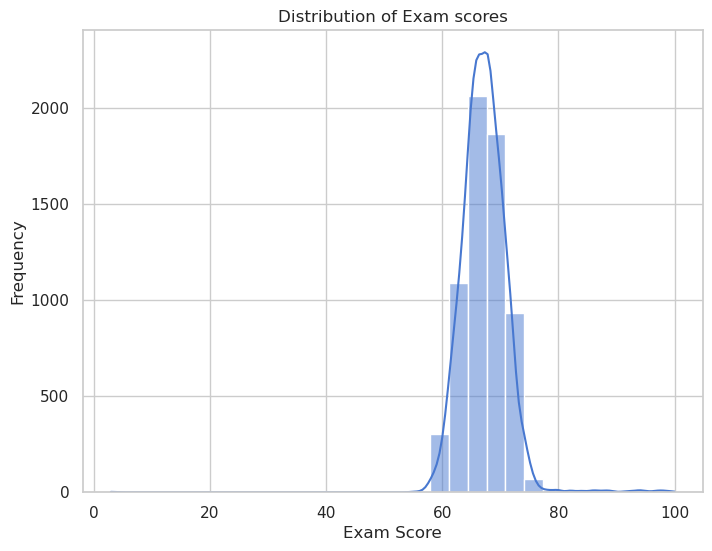

In [10]:
sns.histplot(data['Exam_Score'], kde=True, bins=30)
plt.title("Distribution of Exam scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

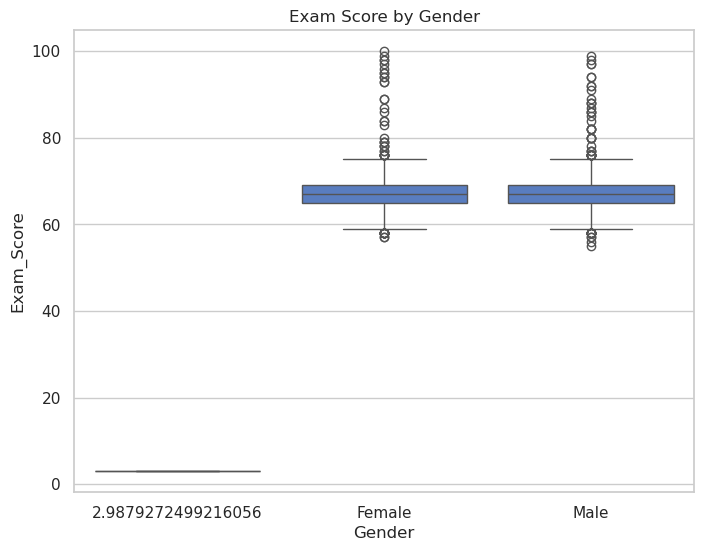

In [11]:
sns.boxplot(data,x = "Gender", y="Exam_Score")
plt.title("Exam Score by Gender")
plt.show()

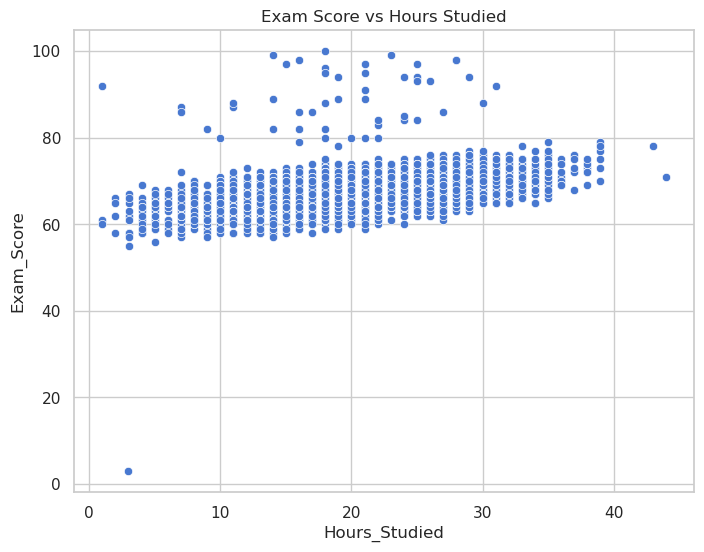

In [12]:
sns.scatterplot(data, x="Hours_Studied", y="Exam_Score")
plt.title("Exam Score vs Hours Studied")
plt.show()

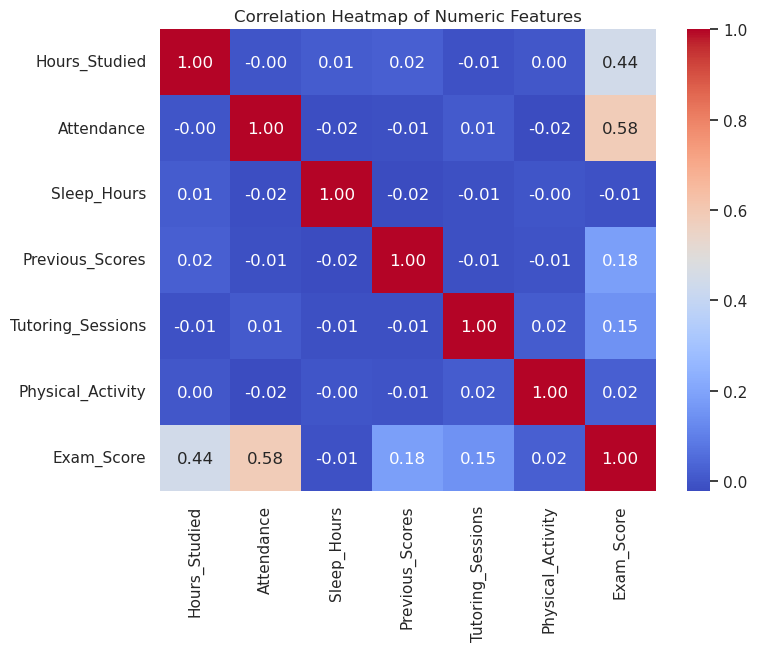

In [13]:
numeric_cols = data.select_dtypes(include='number')
correlation = numeric_cols.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Data Splitting

In [14]:
X = pd.get_dummies(data.drop(columns=['Exam_Score']), drop_first=True)
y = data['Exam_Score']
print(X.shape, y.shape)

(6378, 40) (6378,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (5102, 40)
Test set shape: (1276, 40)


### Model Training

#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

def RMSE(pred, y_test):
    return np.sqrt(np.mean((pred - y_test)) ** 2)

lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print(RMSE(predict, y_test))

0.014699779157858294


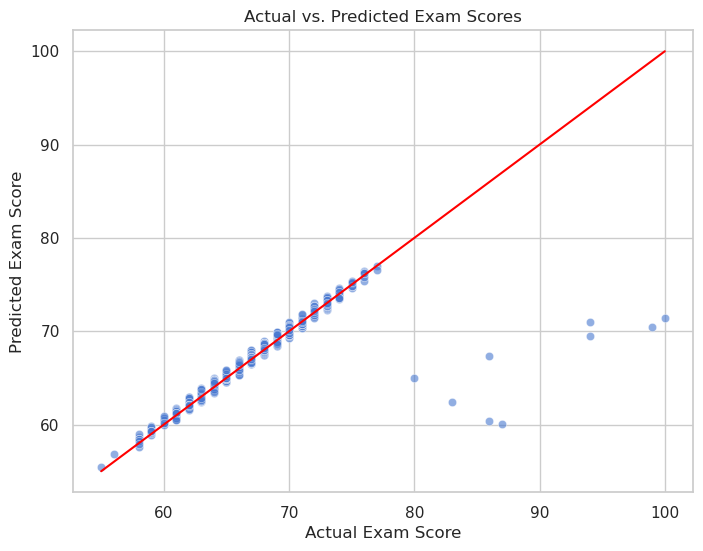

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predict, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')  # Perfect prediction line
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.grid(True)
plt.show()

#### Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_model.fit(X_train, y_train)

poly_predictions = poly_model.predict(X_test)
print(RMSE(poly_predictions, y_test)) ## LR is slightly better

0.04065498999841305


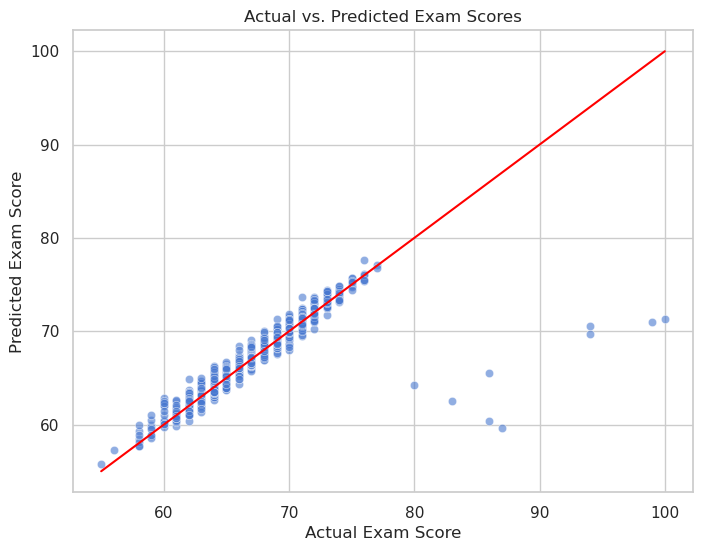

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=poly_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')  # Perfect prediction line
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.grid(True)
plt.show()